# **First News Article - Israel Palestine War**

In [6]:
!pip install requests newspaper3k textblob

In [7]:
from __future__ import unicode_literals
import requests
from newspaper import Article
from textblob import TextBlob
import pandas as pd

from __future__ import unicode_literals
import requests
from newspaper import Article

def GetArticles(query, secret, url, output_file='all_articles.txt'):
    """
    GetArticles function retrieves information about articles based on
    a query from a news API.
    Parameters:
    - query: The query phrase for the articles.
    - secret: Your API key for authentication.
    - url: The URL of the news API.
    - output_file: The filename to save the content of all articles.
    Returns:
    - data: A list of dictionaries containing information about each
    article.
    """
    parameters = {
        'q': query,
        'pageSize': 50,
        'apiKey': secret
    }
    # Make the request to the news API
    response = requests.get(url, params=parameters)
    # Convert the response to JSON format
    response_json = response.json()
    # Create empty list for data
    data = []
    all_articles_content = ''
    # Iterate through articles in the API response
    for i in response_json['articles']:
        article_data = {
            'Title': i["title"],
            'Content': None
        }
        try:
            article = Article(i['url'])
            article.download()
            article.parse()
        except:
            print("Failed To Extract", i['url'])
        else:
            # Update the dictionary with additional information
            article_data['Content'] = article.text
            # Append the article data to the list
            data.append(article_data)
            # Concatenate the content for all articles
            all_articles_content += article.text + '\n\n'
    # Save the content of all articles to a single text file
    save_to_text_file(output_file, all_articles_content)
    return data

def save_to_text_file(filename, content):
    """
    Save content to a text file.
    Parameters:
    - filename: The filename to save to.
    - content: The content to save.
    """
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(content)


def save_to_text_file(filename, content):
    """
    Save content to a text file.
    Parameters:
    - filename: The filename to save to.
    - content: The content to save.
    """
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(content)


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
query = 'Israel Palestine War' # Replace with the topic you're interested in
api_key = 'aa59f29c6c3f4c89bffe468d8ceba351'
api_url = 'https://newsapi.org/v2/everything?'
articles_data = GetArticles(query, api_key, api_url)
# Example: Print the extracted data for each article
for article_data in articles_data:
 print("\nArticle:")
for key, value in article_data.items():
 print(f"{key}: {value}")



Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:
Title: USC Faces Backlash Over Alleged ‘Censorship’ of Pro-Palestinian Valedictorian’s Speech
Content: As the University of Southern California’s Class of 2024 prepares to graduate next month, when some 65,000 people are expected to gather at the Los Angeles campus for its May 10 commencement ceremony, the school has sparked controversy over its cancellation on Monday of the undergraduate valedictorian’s planned speech amid concerns about her pro-Palestinian activism. It’s just the latest flashp

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

def load_data(path):
    documents_list = []  # Initialize an empty list to store the text data
    titles = []          # Initialize an empty list to store titles (truncated to 100 characters)

    # Open the specified file in read mode with UTF-8 encoding
    with open(path, "r", encoding="utf-8") as fin:
        # Iterate over each line in the file
        for line in fin.readlines():
            text = line.strip()  # Remove leading and trailing whitespaces from the line
            documents_list.append(text)  # Add the cleaned line to the documents_list
            # Extract the title from each line (truncated to 100 characters)
            titles.append(text[0:min(len(text), 100)])

    # Return the list of documents and titles
    return documents_list, titles

Mounted at /content/gdrive


In [11]:
data_path = "/content/all_articles.txt"
data, title = load_data(data_path)
data


['The troubles on Columbia University’s campus began over six months ago, long before last week’s protests. Shortly after Hamas’ October 7th attack on Israel, a box truck covered in LED screens displaying the names and photos of dozens of Columbia students started circling a pro-Palestine protest near the university’s Morningside Heights campus. The truck, paid for by the conservative nonprofit Accuracy in Media, called the students “Columbia’s Leading Antisemites.”',
 '',
 '“I literally did not leave my apartment the days my friends told me about it,” a computer science undergraduate, whose name was listed on the truck, told me outside the Columbia encampment on Tuesday afternoon. The student, who did not wish to be identified for fairly obvious reasons, said her name was listed on the truck because a club she was no longer a part of had signed onto an open letter urging Columbia to cut ties with Israel. It was a traumatizing experience for her. “I completely wiped as much as I could 

In [12]:
articles_df=pd.DataFrame(data)
articles_df

,0
0,The troubles on Columbia University’s campus b...
1,
2,“I literally did not leave my apartment the da...
3,
4,Like most of the other people who filtered in ...
...,...
2237,
2238,"In November, USC unveiled a website clarifying..."
2239,
2240,In his announcement of the cancellation of Tab...


In [13]:
print(articles_df.head())

                                                   0
0  The troubles on Columbia University’s campus b...
1                                                   
2  “I literally did not leave my apartment the da...
3                                                   
4  Like most of the other people who filtered in ...


In [14]:
data = articles_df[:100]
tokenized_doc = data[0].replace("[^a-zA-Z#","")
data.shape

(100, 1)

In [15]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

0     troubles columbia university’s campus began ov...
1                                                      
2     literally leave apartment days friends told ab...
3                                                      
4     like most other people filtered encampment, st...
                            ...                        
95                                                     
96    khan also underlined need humanitarian into ga...
97                                                     
98    most doxxing campaigns only last days. effects...
99                                                     
Name: 0, Length: 100, dtype: object

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
from textblob import TextBlob

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     troubles columbia university ’ campus began mo...
1                                                      
2     literally leave apartment days friends told ” ...
3                                                      
4     like people filtered encampment student stayed...
                            ...                        
95                                                     
96    khan also underlined need humanitarian gaza ac...
97                                                     
98      doxxing campaigns last days effects felt months
99                                                     
Name: 0, Length: 100, dtype: object

In [18]:
# Initializing wordnet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

tokenized_doc = tokenized_doc.apply(lemData)
tokenized_doc

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0     trouble columbia university ’ campus began mon...
1                                                      
2     literally leave apartment day friend told ” co...
3                                                      
4     like people filtered encampment student stayed...
                            ...                        
95                                                     
96    khan also underlined need humanitarian gaza ac...
97                                                     
98          doxxing campaign last day effect felt month
99                                                     
Name: 0, Length: 100, dtype: object

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialising the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(max_features= 1000, max_df = 0.5)

#Vectorizing 'X' column
vector =tfidf.fit_transform(tokenized_doc)

#Converting vector into an array
X= vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [22]:
svd_model.components_.shape

(5, 1000)

In [23]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append((t[0],t[1]))


final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)

['Topic 0: ', ('the', 0.5589563307395262), ('of', 0.29192516985288686), ('to', 0.2791326479242678), ('and', 0.25346705027332456), ('in', 0.24176013767644827), ('that', 0.16735906761625302), ('on', 0.14347061404507447)]
['Topic 1: ', ('advertisement', 0.9999999999999996), ('israel', 2.3909991007595462e-15), ('on', 1.8625638437409805e-15), ('gaza', 1.836116784659649e-15), ('war', 1.6252671101717962e-15), ('hamas', 1.4970013874203702e-15), ('university', 1.372259295273075e-15)]
['Topic 2: ', ('university', 0.34695092738708516), ('columbia', 0.29266228049283766), ('students', 0.28996633022348767), ('on', 0.24163068970878754), ('campus', 0.22070096195518624), ('at', 0.17039497914532187), ('protesters', 0.16755613635732652)]
['Topic 3: ', ('the', 0.41227299366584863), ('israel', 0.19098596487510958), ('of', 0.16957267988836316), ('war', 0.15805108666938755), ('in', 0.13392944259630923), ('gaza', 0.1328775488002231), ('hamas', 0.11071805450218475)]
['Topic 4: ', ('israel', 0.2782800162748978)

In [24]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [26]:
stop = stopwords_set
exclude = set(punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents
list_of_docs = tokenized_doc.tolist()

# Implementing the function for list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:1])

AttributeError: 'list' object has no attribute 'tolist'

In [27]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
pprint(lsimodel.print_topics())

NameError: name 'doc_clean' is not defined

In [ ]:
import string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint

# Assuming doc_clean is a list of preprocessed documents
# Example: doc_clean = [["word1", "word2", ...], ["another", "document", ...], ...]

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary, random_state=20, passes=30)

# Printing the topics
pprint(ldamodel.print_topics())



[(0,
  '0.026*"threat" + 0.021*"lynch" + 0.019*"poster" + 0.019*"olivia" + '
  '0.016*"language" + 0.013*"sexual" + 0.013*"violence" + 0.013*"death" + '
  '0.013*"warning" + 0.013*"vulgar"'),
 (1,
  '0.030*"s" + 0.022*"said" + 0.016*"terr" + 0.015*"nt" + 0.012*"someone" + '
  '0.012*"lynch" + 0.009*"people" + 0.008*"view" + 0.008*"used" + '
  '0.008*"action"'),
 (2,
  '0.016*"doxxing" + 0.016*"someone" + 0.014*"image" + 0.013*"last" + '
  '0.013*"campaign" + 0.013*"poster" + 0.013*"fire" + 0.010*"lynch" + '
  '0.010*"caption" + 0.009*"day"'),
 (3,
  '0.031*"lynch" + 0.019*"poster" + 0.016*"fired" + 0.016*"said" + '
  '0.015*"people" + 0.011*"nt" + 0.009*"ve" + 0.008*"email" + '
  '0.008*"statement" + 0.008*"afraid"')]


In [ ]:
# Printing documents per topic and topic strength for each document
for doc_id in range(len(doc_term_matrix)):
    print(f"Document {doc_id}:")
    doc_topics = ldamodel.get_document_topics(doc_term_matrix[doc_id])
    for topic, strength in doc_topics:
        print(f"Topic {topic}: Strength {strength}")
    print("\n")

Document 0:
Topic 0: Strength 0.9790422916412354


Document 1:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 2:
Topic 0: Strength 0.03142990544438362
Topic 1: Strength 0.031432606279850006
Topic 2: Strength 0.9056125283241272
Topic 3: Strength 0.03152497112751007


Document 3:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 4:
Topic 0: Strength 0.9370419979095459
Topic 1: Strength 0.02101011946797371
Topic 2: Strength 0.020845232531428337
Topic 3: Strength 0.021102668717503548


Document 5:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 6:
Topic 0: Strength 0.023315152153372765
Topic 1: Strength 0.022736655548214912
Topic 2: Strength 0.9312142133712769
Topic 3: Strength 0.022733988240361214


Document 7:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 8:
Topic 0: Str

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity

perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.38264156374411

Coherence Score:  0.4156412763153897


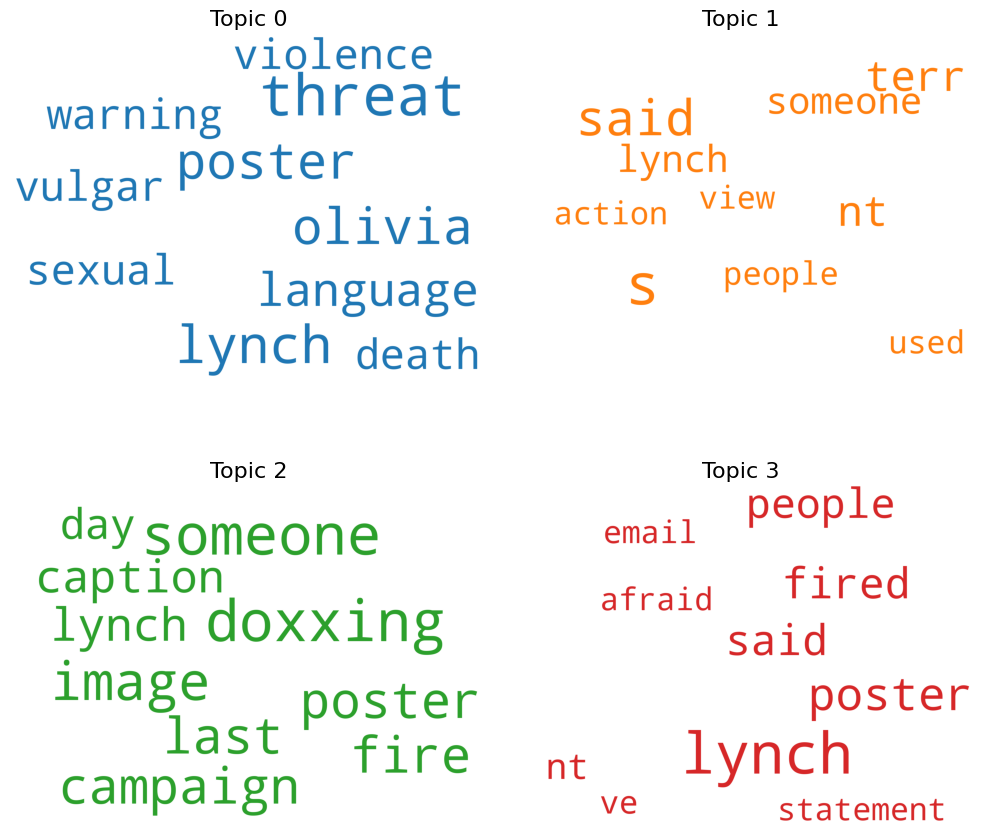

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

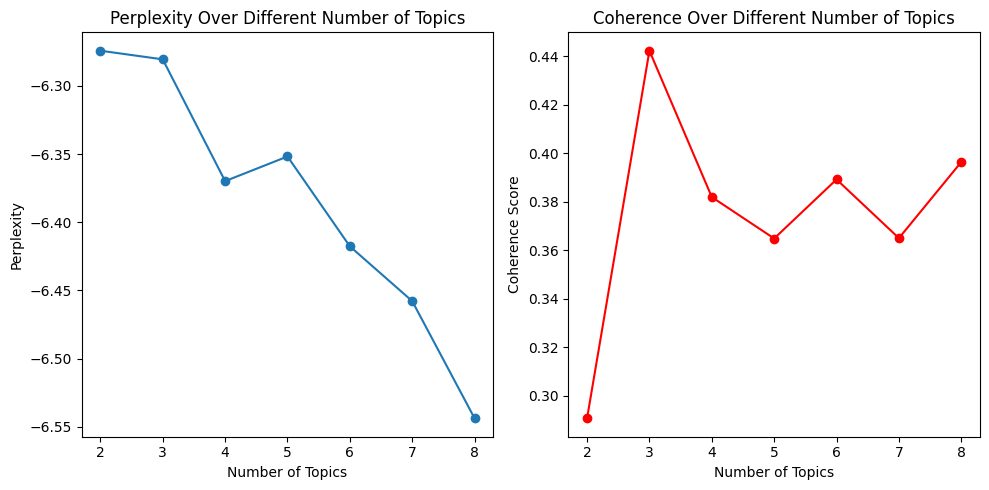

In [ ]:
import matplotlib.pyplot as plt


# Specify the range of topics you want to evaluate
start_topics = 2
end_topics = 8

# Lists to store perplexity and coherence scores
perplexity_scores = []
coherence_scores = []

# Iterate through different numbers of topics
for num_topics in range(start_topics, end_topics + 1):
    # Build LDA model
    ldamodel = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, passes=15)

    # Compute Perplexity
    perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
    perplexity_scores.append(perplexity_lda)

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot perplexity
plt.subplot(1, 2, 1)
plt.plot(range(start_topics, end_topics + 1), perplexity_scores, marker='o')
plt.title('Perplexity Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

# Plot coherence
plt.subplot(1, 2, 2)
plt.plot(range(start_topics, end_topics + 1), coherence_scores, marker='o', color='r')
plt.title('Coherence Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.tight_layout()
plt.show()

# **Second News Article - 2024 Elections in India**

In [ ]:
query = '2024 Elections in India' # Replace with the topic you're interested in
api_key = 'aa59f29c6c3f4c89bffe468d8ceba351'
api_url = 'https://newsapi.org/v2/everything?'
articles_data = GetArticles(query, api_key, api_url)
# Example: Print the extracted data for each article
for article_data in articles_data:
 print("\nArticle:")
for key, value in article_data.items():
 print(f"{key}: {value}")


Failed To Extract https://www.forbes.com/sites/siladityaray/2024/04/19/nearly-1-billion-voters-head-to-the-polls-in-india-what-to-know-about-the-worlds-largest-ever-election/
Failed To Extract https://www.forbes.com/sites/forbesbusinesscouncil/2024/04/17/navigating-uncertainty-in-the-stock-markets-around-elections/

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:
Title: SP, Congress didn’t want Ram temple in Ayodhya; Modi honoured people’s sentiments: Amit Shah
Content: In his first campaign rally for the BJP in UP ahead of the first phase of LS elections, Union 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

def load_data(path):
    documents_list = []  # Initialize an empty list to store the text data
    titles = []          # Initialize an empty list to store titles (truncated to 100 characters)

    # Open the specified file in read mode with UTF-8 encoding
    with open(path, "r", encoding="utf-8") as fin:
        # Iterate over each line in the file
        for line in fin.readlines():
            text = line.strip()  # Remove leading and trailing whitespaces from the line
            documents_list.append(text)  # Add the cleaned line to the documents_list
            # Extract the title from each line (truncated to 100 characters)
            titles.append(text[0:min(len(text), 100)])

    # Return the list of documents and titles
    return documents_list, titles

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = "/content/all_articles.txt"
data, title = load_data(data_path)
data


['',
 '',
 'The world’s biggest election will take place next week when 960 million eligible voters from a population of 1.4 billion Indians cast their ballot to decide who will fill the 543 seats of the Lok Sabha, the more powerful lower house of Parliament—and who will become India’s next prime minister.',
 '',
 'The ruling Bharatiya Janata Party (BJP) is competing against a coalition of more than a dozen opposition parties, including the Indian National Congress, which once ruled over the nation for more than 50 years. At the center of the contest is incumbent Prime Minister Narendra Modi, who first rose to power in 2014 on the promise of economic reform and a Hindu nationalist mandate. If he wins again, Modi will match the record of India’s first prime minister, the Congress leader Jawaharlal Nehru, by staying in power for three consecutive terms.',
 '',
 'Read more: A Make-or-Break Year for Democracy Worldwide',
 '',
 'The election is a long and costly exercise: Voting begins on A

In [ ]:
articles_df=pd.DataFrame(data)
articles_df

,0
0,
1,
2,The world’s biggest election will take place n...
3,
4,The ruling Bharatiya Janata Party (BJP) is com...
...,...
1781,
1782,Saying he has faith in the BJP in ensuring the...
1783,
1784,The 14 seats of west UP will vote in the first...


In [ ]:
print(articles_df.head())

                                                   0
0                                                   
1                                                   
2  The world’s biggest election will take place n...
3                                                   
4  The ruling Bharatiya Janata Party (BJP) is com...


In [ ]:
data = articles_df[:100]
tokenized_doc = data[0].replace("[^a-zA-Z#","")
data.shape

(100, 1)

In [ ]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

0                                                      
1                                                      
2     world’s biggest election will take place next ...
3                                                      
4     ruling bharatiya janata party (bjp) competing ...
                            ...                        
95                                                     
96    with election mere days away, eyes india’s opp...
97                                                     
98    read more: india’s income inequality worse tha...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                                      
1                                                      
2     world ’ biggest election take place next week ...
3                                                      
4     ruling bharatiya janata party bjp competing co...
                            ...                        
95                                                     
96    election mere days away eyes india ’ oppositio...
97                                                     
98    read india ’ income inequality worse british r...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
# Initializing wordnet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

tokenized_doc = tokenized_doc.apply(lemData)
tokenized_doc

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                                      
1                                                      
2     world ’ biggest election take place next week ...
3                                                      
4     ruling bharatiya janata party bjp competing co...
                            ...                        
95                                                     
96    election mere day away eye india ’ opposition ...
97                                                     
98    read india ’ income inequality worse british r...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialising the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(max_features= 1000, max_df = 0.5)

#Vectorizing 'X' column
vector =tfidf.fit_transform(tokenized_doc)

#Converting vector into an array
X= vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,925,926,927,928,929,930,931,932,933,934
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.150241,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.132122,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.090826,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.368436,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [ ]:
svd_model.components_.shape

(5, 935)

In [ ]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append((t[0],t[1]))


final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)

['Topic 0: ', ('india', 0.38114614064687946), ('election', 0.36750226153025833), ('party', 0.31131826083116054), ('indian', 0.17583057442059677), ('modi', 0.15135467037875155), ('opposition', 0.14894519007522264), ('year', 0.14412115648313925)]
['Topic 1: ', ('party', 0.3951687353890079), ('congress', 0.16117346643976516), ('leader', 0.13110445831077092), ('indian', 0.12027097635310616), ('modi', 0.11487262611246021), ('minister', 0.11205981987929182), ('prime', 0.10925078777318827)]
['Topic 2: ', ('tech', 0.3083823173605785), ('platform', 0.22791817683053606), ('hate', 0.16732018877764152), ('disinformation', 0.15184141632421483), ('content', 0.14438864435023932), ('speech', 0.13906268495969376), ('coalition', 0.1303575282826577)]
['Topic 3: ', ('read', 0.5497352542558909), ('report', 0.2102112786242342), ('weak', 0.17956994942999144), ('political', 0.1655737177494239), ('opposition', 0.13253930247482915), ('released', 0.11920196088922813), ('scathing', 0.11920196088922813)]
['Topic 4

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [ ]:
stop = stopwords_set
exclude = set(punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents
list_of_docs = tokenized_doc.tolist()

# Implementing the function for list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:1])

[[]]


In [ ]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '-0.520*"’" + -0.336*"election" + -0.299*"india" + -0.261*"party" + '
  '-0.166*"modi" + -0.160*"indian" + -0.157*"country" + -0.140*"government" + '
  '-0.134*"year" + -0.124*"last"'),
 (1,
  '-0.355*"party" + 0.353*"election" + 0.251*"tech" + 0.196*"platform" + '
  '-0.154*"indian" + -0.137*"modi" + 0.136*"year" + 0.133*"hate" + '
  '0.133*"speech" + -0.125*"congress"'),
 (2,
  '-0.384*"election" + 0.277*"platform" + 0.218*"tech" + 0.177*"hate" + '
  '0.177*"speech" + -0.151*"vote" + 0.139*"violence" + -0.132*"presidential" + '
  '-0.131*"aigenerated" + -0.131*"video"'),
 (3,
  '-0.389*"party" + 0.236*"hindu" + 0.208*"’" + 0.195*"modi" + -0.159*"”" + '
  '-0.145*"congress" + -0.142*"tech" + 0.140*"muslim" + 0.137*"temple" + '
  '-0.134*"candidate"')]


In [ ]:
import string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint

# Assuming doc_clean is a list of preprocessed documents
# Example: doc_clean = [["word1", "word2", ...], ["another", "document", ...], ...]

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary, random_state=20, passes=30)

# Printing the topics
pprint(ldamodel.print_topics())



[(0,
  '0.020*"election" + 0.016*"’" + 0.011*"india" + 0.009*"country" + '
  '0.006*"year" + 0.006*"u" + 0.006*"state" + 0.006*"concern" + 0.006*"vote" + '
  '0.005*"world"'),
 (1,
  '0.026*"’" + 0.023*"election" + 0.014*"india" + 0.012*"tech" + 0.010*"modi" '
  '+ 0.009*"platform" + 0.007*"hindu" + 0.007*"government" + 0.007*"”" + '
  '0.007*"country"'),
 (2,
  '0.028*"’" + 0.016*"party" + 0.016*"india" + 0.014*"election" + '
  '0.012*"opposition" + 0.011*"indian" + 0.010*"modi" + 0.010*"national" + '
  '0.008*"year" + 0.008*"congress"'),
 (3,
  '0.027*"party" + 0.018*"’" + 0.014*"india" + 0.014*"”" + 0.012*"“" + '
  '0.011*"leader" + 0.009*"government" + 0.008*"read" + 0.008*"say" + '
  '0.008*"alliance"')]


In [ ]:
# Printing documents per topic and topic strength for each document
for doc_id in range(len(doc_term_matrix)):
    print(f"Document {doc_id}:")
    doc_topics = ldamodel.get_document_topics(doc_term_matrix[doc_id])
    for topic, strength in doc_topics:
        print(f"Topic {topic}: Strength {strength}")
    print("\n")

Document 0:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 1:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 2:
Topic 2: Strength 0.9750140309333801


Document 3:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 4:
Topic 2: Strength 0.9855449199676514


Document 5:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 6:
Topic 0: Strength 0.04438409209251404
Topic 1: Strength 0.04474774748086929
Topic 2: Strength 0.04608540236949921
Topic 3: Strength 0.8647828102111816


Document 7:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 8:
Topic 1: Strength 0.9881925582885742


Document 9:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 10:
Topic 0: Strength 0.0319358743727

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity

perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.8385243462216225

Coherence Score:  0.5426099147193739


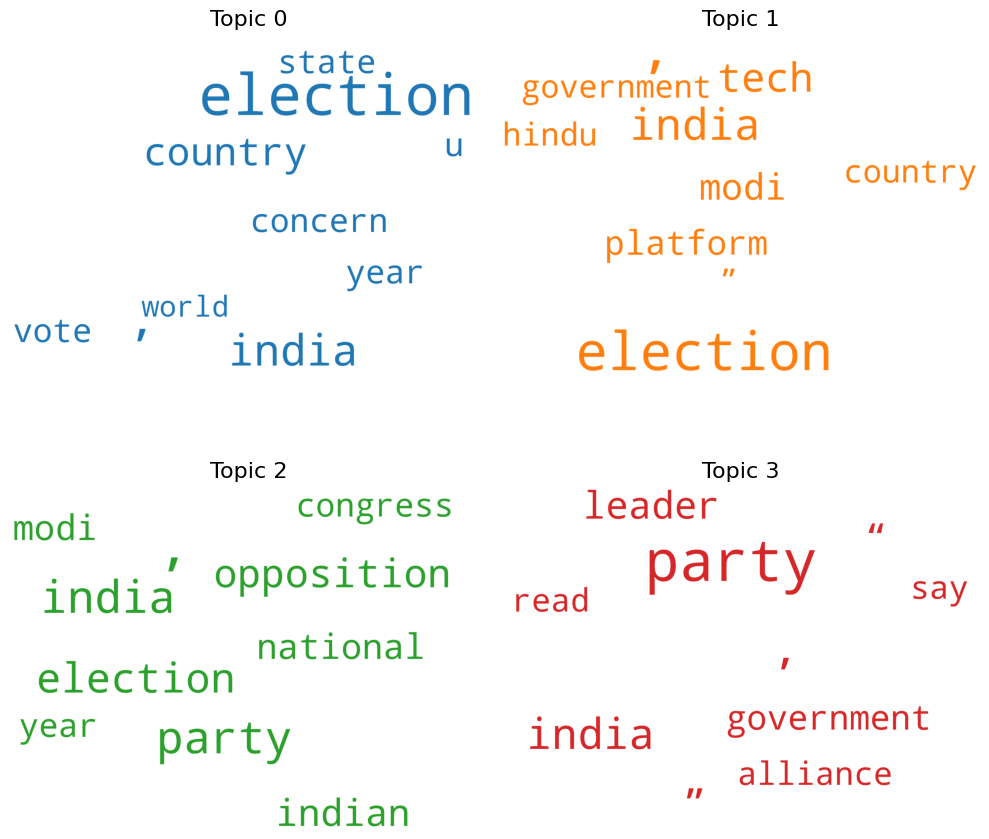

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

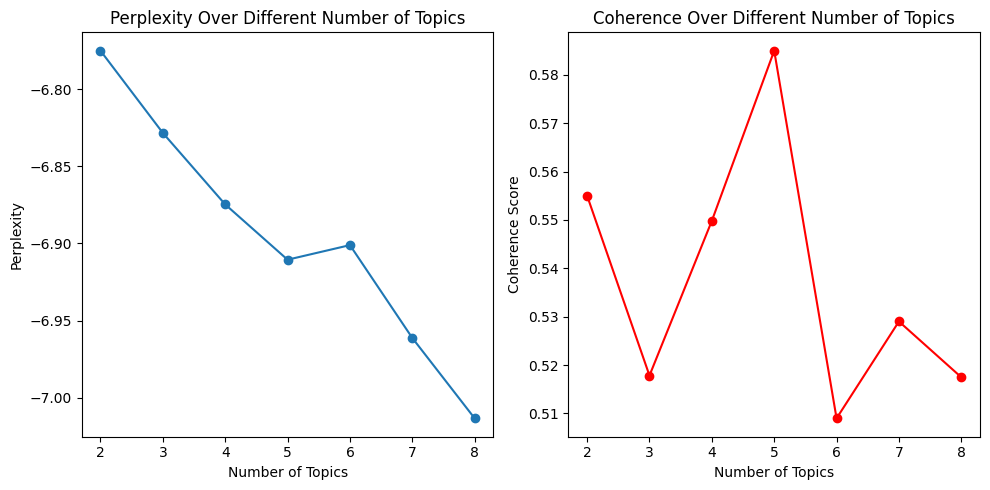

In [ ]:
import matplotlib.pyplot as plt


# Specify the range of topics you want to evaluate
start_topics = 2
end_topics = 8

# Lists to store perplexity and coherence scores
perplexity_scores = []
coherence_scores = []

# Iterate through different numbers of topics
for num_topics in range(start_topics, end_topics + 1):
    # Build LDA model
    ldamodel = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, passes=15)

    # Compute Perplexity
    perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
    perplexity_scores.append(perplexity_lda)

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot perplexity
plt.subplot(1, 2, 1)
plt.plot(range(start_topics, end_topics + 1), perplexity_scores, marker='o')
plt.title('Perplexity Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

# Plot coherence
plt.subplot(1, 2, 2)
plt.plot(range(start_topics, end_topics + 1), coherence_scores, marker='o', color='r')
plt.title('Coherence Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.tight_layout()
plt.show()

# **Third News Article - Taiwan Earthquake**

In [ ]:
query = 'Taiwan Earthquake' # Replace with the topic you're interested in
api_key = 'aa59f29c6c3f4c89bffe468d8ceba351'
api_url = 'https://newsapi.org/v2/everything?'
articles_data = GetArticles(query, api_key, api_url)
# Example: Print the extracted data for each article
for article_data in articles_data:
 print("\nArticle:")
for key, value in article_data.items():
 print(f"{key}: {value}")


Failed To Extract https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_02744d49-888e-4907-9bf8-bc9f6b627c02
Failed To Extract https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_b47eeda9-694d-4a84-a8ab-be37c8c0a20a
Failed To Extract https://www.xda-developers.com/how-tsmc-protects-itself-earthquakes/

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:
Title: Taiwan Rocked by Massive Earthquake, At Least 9 Dead, Scores Injured
Content: Play video content

Taiwan turned into hell on Earth Wednesday morning as a massive earthquake rocked the island o

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

def load_data(path):
    documents_list = []  # Initialize an empty list to store the text data
    titles = []          # Initialize an empty list to store titles (truncated to 100 characters)

    # Open the specified file in read mode with UTF-8 encoding
    with open(path, "r", encoding="utf-8") as fin:
        # Iterate over each line in the file
        for line in fin.readlines():
            text = line.strip()  # Remove leading and trailing whitespaces from the line
            documents_list.append(text)  # Add the cleaned line to the documents_list
            # Extract the title from each line (truncated to 100 characters)
            titles.append(text[0:min(len(text), 100)])

    # Return the list of documents and titles
    return documents_list, titles

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = "/content/all_articles.txt"
data, title = load_data(data_path)
data


['It is along this coastline, with its narrow, winding roads and tunnels carved out of the rock, that dozens have become trapped. The route is popular with tourists, famed for its spectacular views from the mountains out across the Pacific Ocean. But it is also known to be treacherous, not least because of the possibility of landslides.',
 '',
 'Taiwan emerges remarkably unscathed after massive earthquake',
 '',
 'Enlarge this image toggle caption ChiangYing-ying/AP ChiangYing-ying/AP',
 '',
 'HUALIEN CITY, Taiwan – A massive, 7.4 magnitude earthquake that hit Taiwan Wednesday morning sent bridges swaying and buried mountainous roads in landslides.',
 '',
 '"The road below my feet suddenly turned into what felt like waves on water," said Vincent Tseng, a Hualien resident.',
 '',
 'Yet, the day after what was the worst quake to hit the Asian island in a quarter century, most residents cannot stop talking about how much worse it could have been.',
 '',
 'As of Thursday local time, author

In [ ]:
articles_df=pd.DataFrame(data)
articles_df

,0
0,"It is along this coastline, with its narrow, w..."
1,
2,Taiwan emerges remarkably unscathed after mass...
3,
4,Enlarge this image toggle caption ChiangYing-y...
...,...
1217,
1218,Thousands of homes and buildings in Hualien we...
1219,
1220,Taiwanese authorities have launched a major em...


In [ ]:
print(articles_df.head())

                                                   0
0  It is along this coastline, with its narrow, w...
1                                                   
2  Taiwan emerges remarkably unscathed after mass...
3                                                   
4  Enlarge this image toggle caption ChiangYing-y...


In [ ]:
data = articles_df[:100]
tokenized_doc = data[0].replace("[^a-zA-Z#","")
data.shape

(100, 1)

In [ ]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

0     along this coastline, with narrow, winding roa...
1                                                      
2     taiwan emerges remarkably unscathed after mass...
3                                                      
4     enlarge this image toggle caption chiangying-y...
                            ...                        
95                                                     
96    read more: photos devastation after earthquake...
97                                                     
98    express gratitude chinese side their concern,”...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     along coastline narrow winding roads tunnels c...
1                                                      
2     taiwan emerges remarkably unscathed massive ea...
3                                                      
4     enlarge image toggle caption chiangying-ying/a...
                            ...                        
95                                                     
96            read photos devastation earthquake taiwan
97                                                     
98    express gratitude chinese side concern ” taiwa...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
# Initializing wordnet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

tokenized_doc = tokenized_doc.apply(lemData)
tokenized_doc

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0     along coastline narrow winding road tunnel car...
1                                                      
2     taiwan emerges remarkably unscathed massive ea...
3                                                      
4     enlarge image toggle caption chiangying-ying/a...
                            ...                        
95                                                     
96             read photo devastation earthquake taiwan
97                                                     
98    express gratitude chinese side concern ” taiwa...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialising the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(max_features= 1000, max_df = 0.5)

#Vectorizing 'X' column
vector =tfidf.fit_transform(tokenized_doc)

#Converting vector into an array
X= vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,606,607,608,609,610,611,612,613,614,615
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.511908,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [ ]:
svd_model.components_.shape

(5, 616)

In [ ]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append((t[0],t[1]))


final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)

['Topic 0: ', ('earthquake', 0.40574733398694696), ('taiwan', 0.3951553875943606), ('chip', 0.20648897900707783), ('building', 0.1905426706161459), ('wednesday', 0.1567106872063379), ('magnitude', 0.13902743456730052), ('city', 0.13523579796964275)]
['Topic 1: ', ('chip', 0.3967362227560203), ('company', 0.22694351287356612), ('production', 0.2046770562714427), ('tsmc', 0.20458225905716784), ('apple', 0.18161137059924742), ('like', 0.17429440230939075), ('could', 0.14465807060446761)]
['Topic 2: ', ('building', 0.2262025415335995), ('could', 0.21023428981460057), ('like', 0.197242680054903), ('apple', 0.1765951079106024), ('company', 0.1497892237522144), ('people', 0.14641264117684402), ('island', 0.1367856353578252)]
['Topic 3: ', ('image', 0.5654234548657113), ('ap', 0.24597784415041038), ('chiangying', 0.24597784415041038), ('ying', 0.24597784415041038), ('afp', 0.22461494635891427), ('anthony', 0.22461494635891427), ('getty', 0.22461494635891427)]
['Topic 4: ', ('city', 0.239820303

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [ ]:
stop = stopwords_set
exclude = set(punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents
list_of_docs = tokenized_doc.tolist()

# Implementing the function for list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:1])

[['along', 'coastline', 'narrow', 'winding', 'road', 'tunnel', 'carved', 'rock', 'dozen', 'become', 'trapped', 'route', 'popular', 'tourist', 'famed', 'spectacular', 'view', 'mountain', 'across', 'pacific', 'ocean', 'also', 'known', 'treacherous', 'least', 'possibility', 'landslide']]


In [ ]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.502*"taiwan" + 0.445*"earthquake" + 0.207*"’" + 0.187*"building" + '
  '0.184*"chip" + 0.177*"”" + 0.131*"s" + 0.131*"wednesday" + 0.119*"“" + '
  '0.114*"world"'),
 (1,
  '-0.355*"”" + 0.288*"earthquake" + 0.286*"building" + -0.222*"“" + '
  '-0.208*"’" + -0.196*"chip" + -0.193*"company" + -0.160*"fabs" + '
  '-0.160*"evacuated" + -0.136*"advanced"'),
 (2,
  '0.370*"”" + -0.303*"chip" + 0.246*"building" + -0.194*"advanced" + '
  '-0.189*"taiwan" + 0.177*"according" + 0.176*"“" + -0.154*"manufacturing" + '
  '-0.131*"world" + -0.114*"tsmc"'),
 (3,
  '0.333*"building" + -0.312*"taiwan" + 0.227*"chip" + 0.159*"company" + '
  '-0.156*"disaster" + -0.155*"’" + 0.151*"advanced" + -0.132*"council" + '
  '-0.132*"chinese" + -0.132*"affair"')]


In [ ]:
import string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint

# Assuming doc_clean is a list of preprocessed documents
# Example: doc_clean = [["word1", "word2", ...], ["another", "document", ...], ...]

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary, random_state=20, passes=30)

# Printing the topics
pprint(ldamodel.print_topics())



[(0,
  '0.014*"taiwan" + 0.012*"building" + 0.009*"image" + 0.009*"people" + '
  '0.009*"’" + 0.007*"island" + 0.007*"year" + 0.007*"manufacturing" + '
  '0.007*"sign" + 0.007*"market"'),
 (1,
  '0.022*"earthquake" + 0.012*"infrastructure" + 0.012*"building" + '
  '0.012*"taiwan" + 0.008*"time" + 0.008*"island" + 0.008*"damaged" + '
  '0.008*"massive" + 0.008*"much" + 0.008*"damage"'),
 (2,
  '0.027*"earthquake" + 0.027*"taiwan" + 0.014*"”" + 0.012*"s" + '
  '0.012*"building" + 0.009*"wednesday" + 0.009*"said" + 0.007*"company" + '
  '0.007*"“" + 0.007*"east"'),
 (3,
  '0.026*"taiwan" + 0.021*"earthquake" + 0.014*"chip" + 0.012*"’" + '
  '0.010*"world" + 0.010*"say" + 0.010*"production" + 0.007*"like" + '
  '0.007*"tsmc" + 0.007*"taipei"')]


In [ ]:
# Printing documents per topic and topic strength for each document
for doc_id in range(len(doc_term_matrix)):
    print(f"Document {doc_id}:")
    doc_topics = ldamodel.get_document_topics(doc_term_matrix[doc_id])
    for topic, strength in doc_topics:
        print(f"Topic {topic}: Strength {strength}")
    print("\n")

Document 0:
Topic 0: Strength 0.9730324149131775


Document 1:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 2:
Topic 0: Strength 0.03646127134561539
Topic 1: Strength 0.8888552784919739
Topic 2: Strength 0.037470560520887375
Topic 3: Strength 0.03721292316913605


Document 3:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 4:
Topic 0: Strength 0.8926716446876526
Topic 1: Strength 0.03586464002728462
Topic 2: Strength 0.03573165088891983
Topic 3: Strength 0.03573206812143326


Document 5:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 6:
Topic 0: Strength 0.9532918334007263
Topic 1: Strength 0.01541273482143879
Topic 2: Strength 0.01588096097111702
Topic 3: Strength 0.015414493158459663


Document 7:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 8:
Topic 0: Strengt

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity

perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.684722552550666

Coherence Score:  0.4101473491218528


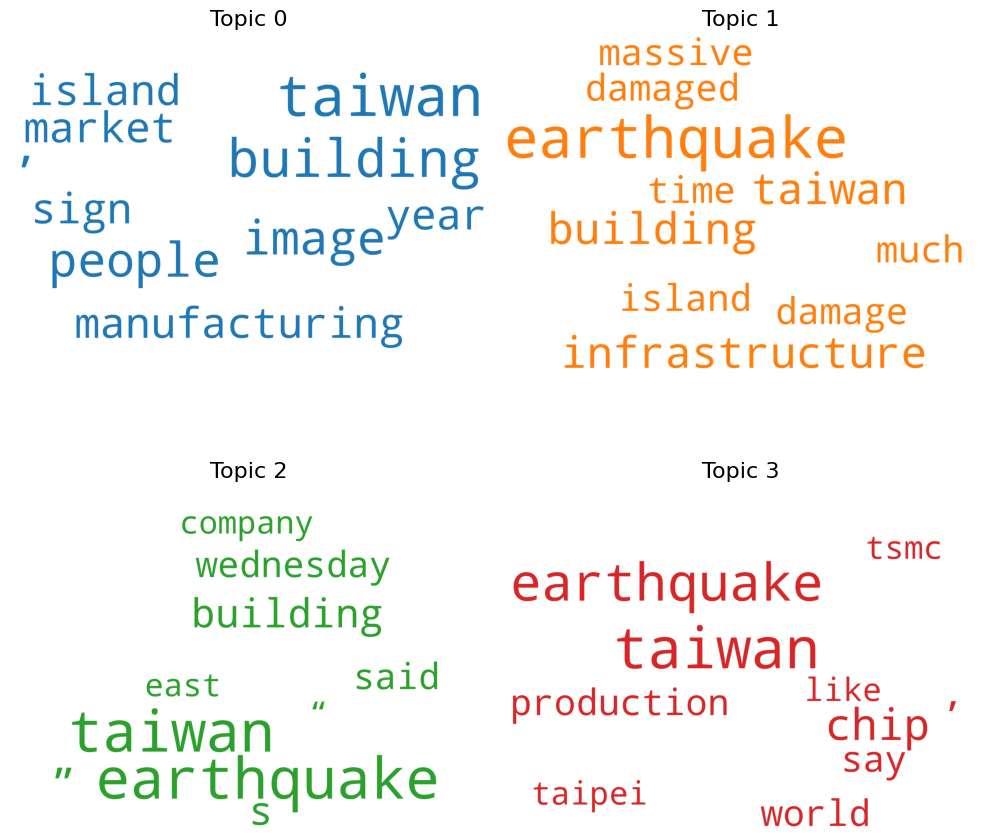

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

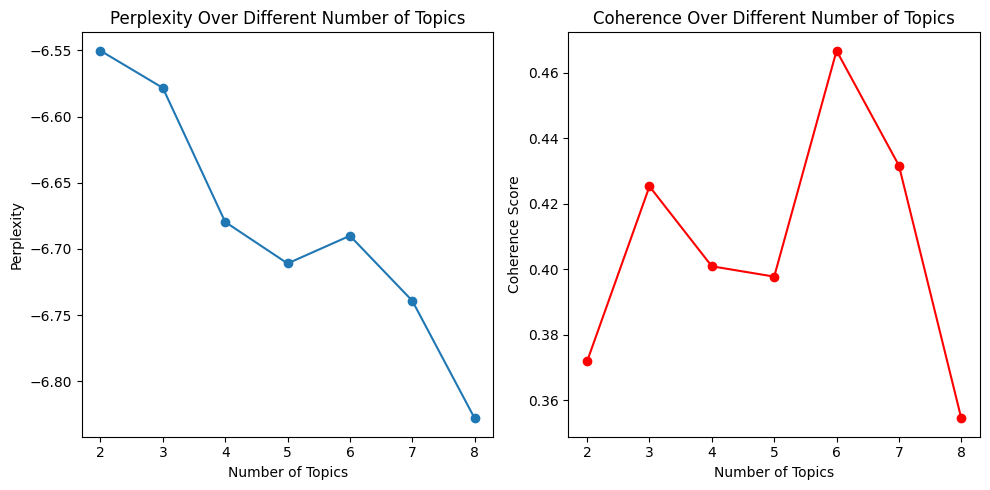

In [ ]:
import matplotlib.pyplot as plt


# Specify the range of topics you want to evaluate
start_topics = 2
end_topics = 8

# Lists to store perplexity and coherence scores
perplexity_scores = []
coherence_scores = []

# Iterate through different numbers of topics
for num_topics in range(start_topics, end_topics + 1):
    # Build LDA model
    ldamodel = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, passes=15)

    # Compute Perplexity
    perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
    perplexity_scores.append(perplexity_lda)

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot perplexity
plt.subplot(1, 2, 1)
plt.plot(range(start_topics, end_topics + 1), perplexity_scores, marker='o')
plt.title('Perplexity Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

# Plot coherence
plt.subplot(1, 2, 2)
plt.plot(range(start_topics, end_topics + 1), coherence_scores, marker='o', color='r')
plt.title('Coherence Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.tight_layout()
plt.show()

# **Fourth News Article - Ukraine Russia War**

In [ ]:
query = 'Ukraine Russia War' # Replace with the topic you're interested in
api_key = 'aa59f29c6c3f4c89bffe468d8ceba351'
api_url = 'https://newsapi.org/v2/everything?'
articles_data = GetArticles(query, api_key, api_url)
# Example: Print the extracted data for each article
for article_data in articles_data:
 print("\nArticle:")
for key, value in article_data.items():
 print(f"{key}: {value}")


Failed To Extract https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_bb05c276-2309-4fa7-840f-98d127de5b68

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:
Title: Russia's firing new, long-range Kh-69 cruise missiles, war experts say, piling on the misery for Ukraine's dwindling air defense
Content: By clicking “Sign Up”, you accept our Terms of Service and Privacy Policy . You can opt-out at any time.

Access your favorite topics in a personalized feed while you're on the go. download the app

Sign up to get the inside scoop on today’s b

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

def load_data(path):
    documents_list = []  # Initialize an empty list to store the text data
    titles = []          # Initialize an empty list to store titles (truncated to 100 characters)

    # Open the specified file in read mode with UTF-8 encoding
    with open(path, "r", encoding="utf-8") as fin:
        # Iterate over each line in the file
        for line in fin.readlines():
            text = line.strip()  # Remove leading and trailing whitespaces from the line
            documents_list.append(text)  # Add the cleaned line to the documents_list
            # Extract the title from each line (truncated to 100 characters)
            titles.append(text[0:min(len(text), 100)])

    # Return the list of documents and titles
    return documents_list, titles

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = "/content/all_articles.txt"
data, title = load_data(data_path)
data


["We're closing our live coverage now, following a very busy day in Congress.",
 '',
 "We'll be following all the fallout and developments arising from today's votes in the coming hours, days and weeks.",
 '',
 'You can read our full story here.',
 '',
 'This page was edited by Tiffany Wertheimer and the writer was Sean Seddon. Anthony Zurcher provided analysis from Washington DC, Helena Humphrey was on Capitol Hill and James Waterhouse reported from Kyiv.',
 '',
 'A military court in Russia sentenced a spokesperson for Meta to six years in prison on Monday, according to a new report from the English-language Moscow Times. Andy Stone was convicted in absentia for the “justification” of terrorism after the Facebook parent company changed its rules about what’s considered violent speech shortly after Russia invaded Ukraine in 2022.',
 '',
 'Making the Facebook Papers Public CC Share Subtitles Off',
 '',
 'English view video Making the Facebook Papers Public',
 '',
 'The Russian military 

In [ ]:
articles_df=pd.DataFrame(data)
articles_df

,0
0,"We're closing our live coverage now, following..."
1,
2,We'll be following all the fallout and develop...
3,
4,You can read our full story here.
...,...
2241,
2242,"According to The War Zone, the Kh-69 was devel..."
2243,
2244,Russian forces can launch the missiles from Su...


In [ ]:
print(articles_df.head())

                                                   0
0  We're closing our live coverage now, following...
1                                                   
2  We'll be following all the fallout and develop...
3                                                   
4                  You can read our full story here.


In [ ]:
data = articles_df[:100]
tokenized_doc = data[0].replace("[^a-zA-Z#","")
data.shape

(100, 1)

In [ ]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

0     we're closing live coverage now, following ver...
1                                                      
2     we'll following fallout developments arising f...
3                                                      
4                                 read full story here.
                            ...                        
95                                                     
96    this story available exclusively business insi...
97                                                     
98    fails, ukraine's european allies don't step uk...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     're closing live coverage following busy congress
1                                                      
2     'll following fallout developments arising tod...
3                                                      
4                                       read full story
                            ...                        
95                                                     
96    story available exclusively business insider s...
97                                                     
98    fails ukraine 's european allies n't step ukra...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
# Initializing wordnet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

tokenized_doc = tokenized_doc.apply(lemData)
tokenized_doc

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0     're closing live coverage following busy congress
1                                                      
2     'll following fallout development arising toda...
3                                                      
4                                       read full story
                            ...                        
95                                                     
96    story available exclusively business insider s...
97                                                     
98    fails ukraine 's european ally n't step ukrain...
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialising the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(max_features= 1000, max_df = 0.5)

#Vectorizing 'X' column
vector =tfidf.fit_transform(tokenized_doc)

#Converting vector into an array
X= vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [ ]:
svd_model.components_.shape

(5, 625)

In [ ]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append((t[0],t[1]))


final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)

['Topic 0: ', ('advertisement', 1.0), ('army', 1.5596760739426139e-15), ('cyber', 1.5596760739426139e-15), ('reborn', 1.4868499625420998e-15), ('water', 1.3601741228338337e-15), ('russia', 1.3406414653420163e-15), ('utility', 1.0277364985014757e-15)]
['Topic 1: ', ('army', 0.3148281618777336), ('cyber', 0.3148281618777336), ('reborn', 0.30025775571407537), ('russia', 0.2719998765039932), ('water', 0.271671131258966), ('utility', 0.20524591185636554), ('show', 0.17230504296343252)]
['Topic 2: ', ('russian', 0.287484840550046), ('ukraine', 0.23686025899392144), ('stone', 0.19586458977497861), ('violent', 0.19314916622916214), ('2022', 0.18940380903661852), ('invasion', 0.16901152583385728), ('speech', 0.16841791665293793)]
['Topic 3: ', ('making', 0.3700963563814299), ('paper', 0.3700963563814299), ('public', 0.35537011403260216), ('facebook', 0.31980351662653284), ('video', 0.27311203898352104), ('view', 0.20545229601260048), ('share', 0.19786909873244415)]
['Topic 4: ', ('facebook', 0.

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [ ]:
stop = stopwords_set
exclude = set(punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents
list_of_docs = tokenized_doc.tolist()

# Implementing the function for list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:1])

[['re', 'closing', 'live', 'coverage', 'following', 'busy', 'congress']]


In [ ]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.454*"’" + 0.269*"russia" + 0.251*"water" + 0.237*"utility" + '
  '0.229*"hacker" + 0.201*"video" + 0.189*"cyber" + 0.189*"army" + '
  '0.170*"reborn" + 0.157*"sandworm"'),
 (1,
  '-0.312*"russia" + -0.303*"sandworm" + -0.257*"army" + -0.257*"cyber" + '
  '0.256*"’" + -0.250*"reborn" + 0.215*"official" + 0.208*"utility" + '
  '-0.161*"mandiant" + 0.158*"town"'),
 (2,
  '0.372*"french" + 0.340*"video" + -0.305*"’" + -0.237*"sandworm" + 0.162*"”" '
  '+ 0.134*"control" + 0.132*"rooster" + 0.128*"macron" + 0.128*"courlon" + '
  '0.127*"water"'),
 (3,
  '0.344*"’" + -0.250*"water" + -0.222*"utility" + 0.219*"ukraine" + '
  '0.217*"russian" + 0.158*"russia" + -0.153*"army" + -0.153*"cyber" + '
  '-0.138*"hacker" + 0.135*"”"')]


In [ ]:
import string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint

# Assuming doc_clean is a list of preprocessed documents
# Example: doc_clean = [["word1", "word2", ...], ["another", "document", ...], ...]

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary, random_state=20, passes=30)

# Printing the topics
pprint(ldamodel.print_topics())



[(0,
  '0.017*"russian" + 0.013*"ukraine" + 0.010*"russia" + 0.010*"call" + '
  '0.010*"invasion" + 0.010*"video" + 0.010*"’" + 0.009*"wastewater" + '
  '0.008*"show" + 0.007*"according"'),
 (1,
  '0.023*"’" + 0.014*"water" + 0.012*"french" + 0.012*"video" + '
  '0.010*"utility" + 0.010*"ukraine" + 0.010*"hacker" + 0.008*"system" + '
  '0.008*"official" + 0.008*"public"'),
 (2,
  '0.017*"advertisement" + 0.010*"utility" + 0.010*"water" + 0.010*"change" + '
  '0.010*"russia" + 0.007*"meta" + 0.007*"“" + 0.007*"ukraine" + 0.007*"”" + '
  '0.007*"u"'),
 (3,
  '0.029*"’" + 0.023*"russia" + 0.020*"cyber" + 0.020*"army" + 0.018*"reborn" '
  '+ 0.014*"russian" + 0.013*"sandworm" + 0.013*"water" + 0.010*"”" + '
  '0.009*"group"')]


In [ ]:
# Printing documents per topic and topic strength for each document
for doc_id in range(len(doc_term_matrix)):
    print(f"Document {doc_id}:")
    doc_topics = ldamodel.get_document_topics(doc_term_matrix[doc_id])
    for topic, strength in doc_topics:
        print(f"Topic {topic}: Strength {strength}")
    print("\n")

Document 0:
Topic 0: Strength 0.031545933336019516
Topic 1: Strength 0.03127242997288704
Topic 2: Strength 0.9057939648628235
Topic 3: Strength 0.03138766065239906


Document 1:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 2:
Topic 0: Strength 0.9418942928314209
Topic 1: Strength 0.019370390102267265
Topic 2: Strength 0.019354673102498055
Topic 3: Strength 0.01938069798052311


Document 3:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 4:
Topic 0: Strength 0.06259733438491821
Topic 1: Strength 0.8088769316673279
Topic 2: Strength 0.06260322779417038
Topic 3: Strength 0.06592251360416412


Document 5:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 6:
Topic 0: Strength 0.011924756690859795
Topic 1: Strength 0.96420818567276
Topic 2: Strength 0.011925965547561646
Topic 3: Strength 0.0119411526247859


Document 7:
Topic 0:

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity

perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.578767319404144

Coherence Score:  0.5850996542664664


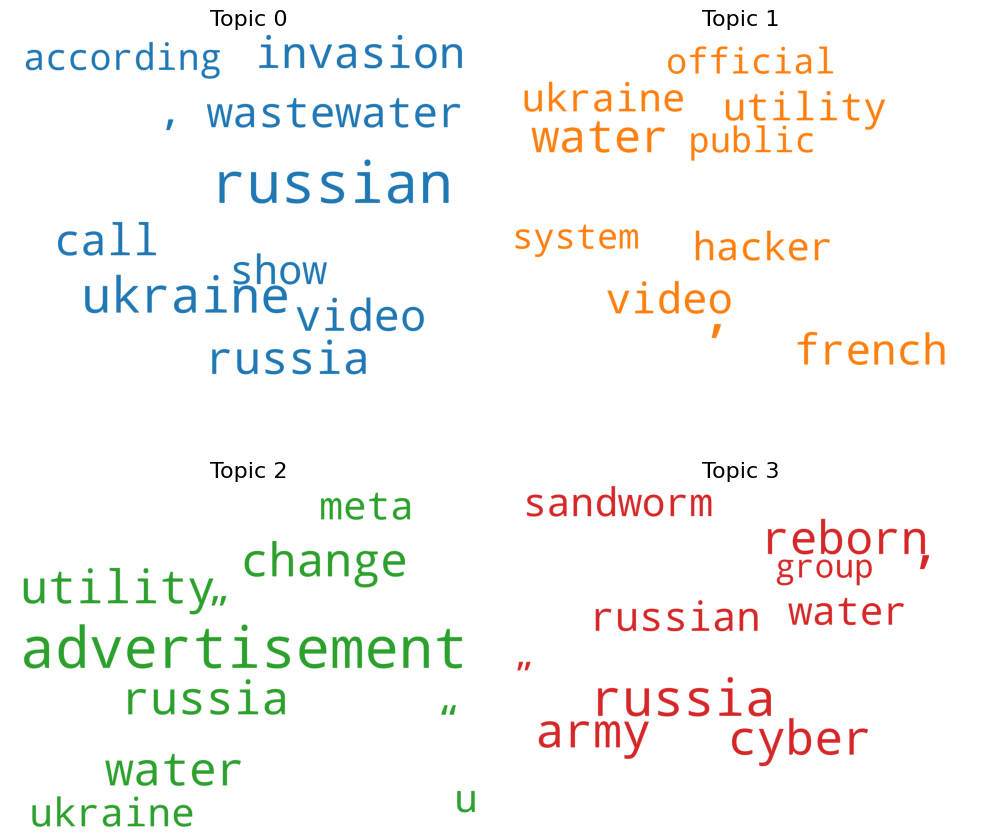

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

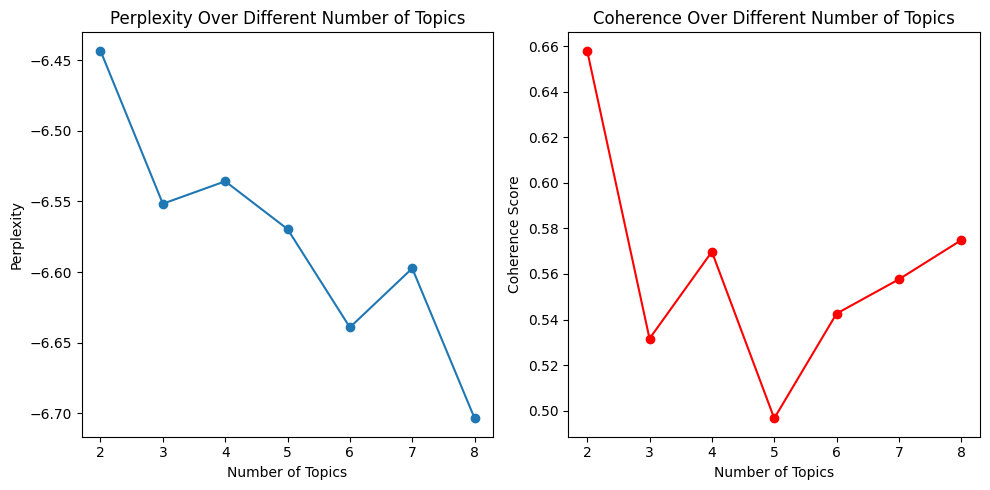

In [ ]:
import matplotlib.pyplot as plt


# Specify the range of topics you want to evaluate
start_topics = 2
end_topics = 8

# Lists to store perplexity and coherence scores
perplexity_scores = []
coherence_scores = []

# Iterate through different numbers of topics
for num_topics in range(start_topics, end_topics + 1):
    # Build LDA model
    ldamodel = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, passes=15)

    # Compute Perplexity
    perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
    perplexity_scores.append(perplexity_lda)

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot perplexity
plt.subplot(1, 2, 1)
plt.plot(range(start_topics, end_topics + 1), perplexity_scores, marker='o')
plt.title('Perplexity Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

# Plot coherence
plt.subplot(1, 2, 2)
plt.plot(range(start_topics, end_topics + 1), coherence_scores, marker='o', color='r')
plt.title('Coherence Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.tight_layout()
plt.show()

# **Fifth News Article - Artificial Intelligence**

In [ ]:
query = 'Artificial Intelligence' # Replace with the topic you're interested in
api_key = 'aa59f29c6c3f4c89bffe468d8ceba351'
api_url = 'https://newsapi.org/v2/everything?'
articles_data = GetArticles(query, api_key, api_url)
# Example: Print the extracted data for each article
for article_data in articles_data:
 print("\nArticle:")
for key, value in article_data.items():
 print(f"{key}: {value}")


Failed To Extract https://venturebeat.com/ai/read-ai-raises-21m-to-bring-connected-intelligence-to-meetings-email-and-messaging/

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:

Article:
Title: How AI is paving the way to smoother streets using autonomous robots
Content: Have you ever been in a situation where you're cruising down the road, enjoying a smooth ride, when suddenly — wham — you hit a pothole?

It jolts your car and reminds you of the never-ending battle against these road menaces.

Well, that scenario could be over very soon.

Tech firm Robotiz3d is

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

def load_data(path):
    documents_list = []  # Initialize an empty list to store the text data
    titles = []          # Initialize an empty list to store titles (truncated to 100 characters)

    # Open the specified file in read mode with UTF-8 encoding
    with open(path, "r", encoding="utf-8") as fin:
        # Iterate over each line in the file
        for line in fin.readlines():
            text = line.strip()  # Remove leading and trailing whitespaces from the line
            documents_list.append(text)  # Add the cleaned line to the documents_list
            # Extract the title from each line (truncated to 100 characters)
            titles.append(text[0:min(len(text), 100)])

    # Return the list of documents and titles
    return documents_list, titles

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = "/content/all_articles.txt"
data, title = load_data(data_path)
data


['Another potential strategy to diversify the output from AI models is for developers to add guardrails and modify user prompts, nudging the software toward inclusivity. OpenAI appears to have taken this approach. When I asked Dall-E 3 via ChatGPT to “draw a cartoon of a queer couple enjoying a night out in the Castro,” it expanded the image prompt, without my asking, into an entire paragraph that included gender, race, and additional background details. Here’s is the full prompt crafted by ChatGPT from my initial image request:',
 '',
 'A cartoon illustration of a queer couple enjoying a night out in the Castro District, San Francisco. They are happily walking hand in hand, smiling and chatting. One person is a Caucasian woman with short red hair, wearing a stylish denim jacket and jeans. The other person is a Black man with short black hair, sporting a casual green t-shirt and black pants. The background features the vibrant and colorful street life of the Castro, with rainbow flags,

In [ ]:
articles_df=pd.DataFrame(data)
articles_df

,0
0,Another potential strategy to diversify the ou...
1,
2,A cartoon illustration of a queer couple enjoy...
3,
4,"While helpful in some cases, the altering of p..."
...,...
1519,
1520,Answers to the most asked CyberGuy questions:
1521,
1522,Copyright 2024 CyberGuy.com. All rights reserved.


In [ ]:
print(articles_df.head())

                                                   0
0  Another potential strategy to diversify the ou...
1                                                   
2  A cartoon illustration of a queer couple enjoy...
3                                                   
4  While helpful in some cases, the altering of p...


In [ ]:
data = articles_df[:100]
tokenized_doc = data[0].replace("[^a-zA-Z#","")
data.shape

(100, 1)

In [ ]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

0     another potential strategy diversify output fr...
1                                                      
2     cartoon illustration queer couple enjoying nig...
3                                                      
4     while helpful some cases, altering prompts als...
                            ...                        
95                                                     
96    elon musk spent entire career making predictio...
97                                                     
98                                        advertisement
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     another potential strategy diversify output mo...
1                                                      
2     cartoon illustration queer couple enjoying nig...
3                                                      
4     helpful cases altering prompts also frustratin...
                            ...                        
95                                                     
96    elon musk spent entire career making predictio...
97                                                     
98                                        advertisement
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
# Initializing wordnet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

tokenized_doc = tokenized_doc.apply(lemData)
tokenized_doc

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0     another potential strategy diversify output mo...
1                                                      
2     cartoon illustration queer couple enjoying nig...
3                                                      
4     helpful case altering prompt also frustrating ...
                            ...                        
95                                                     
96    elon musk spent entire career making predictio...
97                                                     
98                                        advertisement
99                                                     
Name: 0, Length: 100, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialising the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(max_features= 1000, max_df = 0.5)

#Vectorizing 'X' column
vector =tfidf.fit_transform(tokenized_doc)

#Converting vector into an array
X= vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,868,869,870,871,872,873,874,875,876,877
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.156548,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [ ]:
svd_model.components_.shape

(5, 878)

In [ ]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append((t[0],t[1]))


final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)

['Topic 0: ', ('advertisement', 1.0), ('000', 0.0), ('check', -4.390693686802373e-43), ('doctor', -4.390693686802373e-43), ('everything', -4.390693686802373e-43), ('expect', -4.390693686802373e-43), ('latest', -4.390693686802373e-43)]
['Topic 1: ', ('video', 0.28923854549544487), ('prompt', 0.16014106159416897), ('people', 0.15539132504063627), ('sora', 0.15283147576052147), ('openai', 0.14636121710956126), ('queer', 0.14057801419066124), ('chatgpt', 0.12760420752520646)]
['Topic 2: ', ('tiktok', 0.18202879934099786), ('english', 0.18189781619441783), ('view', 0.18189781619441783), ('share', 0.17610867910085454), ('subtitle', 0.17610867910085454), ('congress', 0.17597769595427462), ('creator', 0.17597769595427462)]
['Topic 3: ', ('share', 0.2163062430429803), ('subtitle', 0.2163062430429803), ('congress', 0.21188986384385283), ('creator', 0.21188986384385283), ('tech', 0.2017486615377984), ('buddy', 0.20078589735935481), ('chatgpt', 0.19079467390224752)]
['Topic 4: ', ('chip', 0.323245

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [ ]:
stop = stopwords_set
exclude = set(punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents
list_of_docs = tokenized_doc.tolist()

# Implementing the function for list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:1])

[['another', 'potential', 'strategy', 'diversify', 'output', 'model', 'developer', 'guardrail', 'modify', 'user', 'prompt', 'nudging', 'software', 'toward', 'inclusivity', 'openai', 'appears', 'taken', 'approach', 'asked', 'dalle', 'chatgpt', '“', 'draw', 'cartoon', 'queer', 'couple', 'enjoying', 'night', 'castro', '”', 'expanded', 'image', 'prompt', 'without', 'asking', 'entire', 'paragraph', 'included', 'gender', 'race', 'additional', 'background', 'detail', '’', 'full', 'prompt', 'crafted', 'chatgpt', 'initial', 'image', 'request']]


In [ ]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.435*"’" + 0.427*"”" + 0.351*"“" + 0.328*"researcher" + 0.212*"political" '
  '+ 0.142*"write" + 0.140*"algorithm" + 0.115*"accuracy" + '
  '0.115*"participant" + 0.108*"even"'),
 (1,
  '-0.289*"’" + 0.274*"researcher" + -0.204*"people" + -0.182*"prompt" + '
  '-0.168*"like" + -0.150*"queer" + -0.146*"s" + 0.142*"political" + '
  '-0.131*"image" + -0.122*"tool"'),
 (2,
  '-0.359*"’" + 0.354*"”" + 0.319*"“" + -0.237*"political" + 0.169*"smaller" + '
  '0.163*"liberal" + 0.163*"conservative" + 0.154*"queer" + -0.118*"algorithm" '
  '+ -0.115*"accuracy"'),
 (3,
  '0.473*"chip" + 0.270*"data" + 0.175*"lightmatter" + 0.167*"would" + '
  '0.164*"altman" + 0.164*"connecting" + 0.155*"center" + 0.143*"openai" + '
  '-0.141*"’" + 0.137*"electrical"')]


In [ ]:
import string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint

# Assuming doc_clean is a list of preprocessed documents
# Example: doc_clean = [["word1", "word2", ...], ["another", "document", ...], ...]

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary, random_state=20, passes=30)

# Printing the topics
pprint(ldamodel.print_topics())



[(0,
  '0.017*"’" + 0.016*"”" + 0.014*"“" + 0.013*"people" + 0.013*"face" + '
  '0.011*"queer" + 0.010*"facial" + 0.008*"researcher" + 0.007*"like" + '
  '0.007*"liberal"'),
 (1,
  '0.018*"’" + 0.013*"chip" + 0.010*"”" + 0.009*"data" + 0.009*"researcher" + '
  '0.009*"political" + 0.009*"robot" + 0.009*"lopez" + 0.007*"algorithm" + '
  '0.007*"lightmatter"'),
 (2,
  '0.019*"’" + 0.013*"video" + 0.013*"person" + 0.007*"hand" + '
  '0.007*"technology" + 0.007*"sora" + 0.007*"black" + 0.007*"political" + '
  '0.005*"claim" + 0.005*"clip"'),
 (3,
  '0.016*"’" + 0.012*"”" + 0.012*"s" + 0.012*"advertisement" + 0.010*"people" '
  '+ 0.010*"prompt" + 0.008*"tool" + 0.006*"company" + 0.006*"openai" + '
  '0.006*"float"')]


In [ ]:
# Printing documents per topic and topic strength for each document
for doc_id in range(len(doc_term_matrix)):
    print(f"Document {doc_id}:")
    doc_topics = ldamodel.get_document_topics(doc_term_matrix[doc_id])
    for topic, strength in doc_topics:
        print(f"Topic {topic}: Strength {strength}")
    print("\n")

Document 0:
Topic 0: Strength 0.9855175614356995


Document 1:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 2:
Topic 2: Strength 0.9866769909858704


Document 3:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 4:
Topic 3: Strength 0.9882920980453491


Document 5:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 6:
Topic 0: Strength 0.9873917698860168


Document 7:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 8:
Topic 2: Strength 0.9788918495178223


Document 9:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 10:
Topic 3: Strength 0.9883906245231628


Document 11:
Topic 0: Strength 0.25
Topic 1: Strength 0.25
Topic 2: Strength 0.25
Topic 3: Strength 0.25


Document 12:
Topic 3: Strength 0.9768972992897034


Docu

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity

perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.903618136381126

Coherence Score:  0.40871986603086286


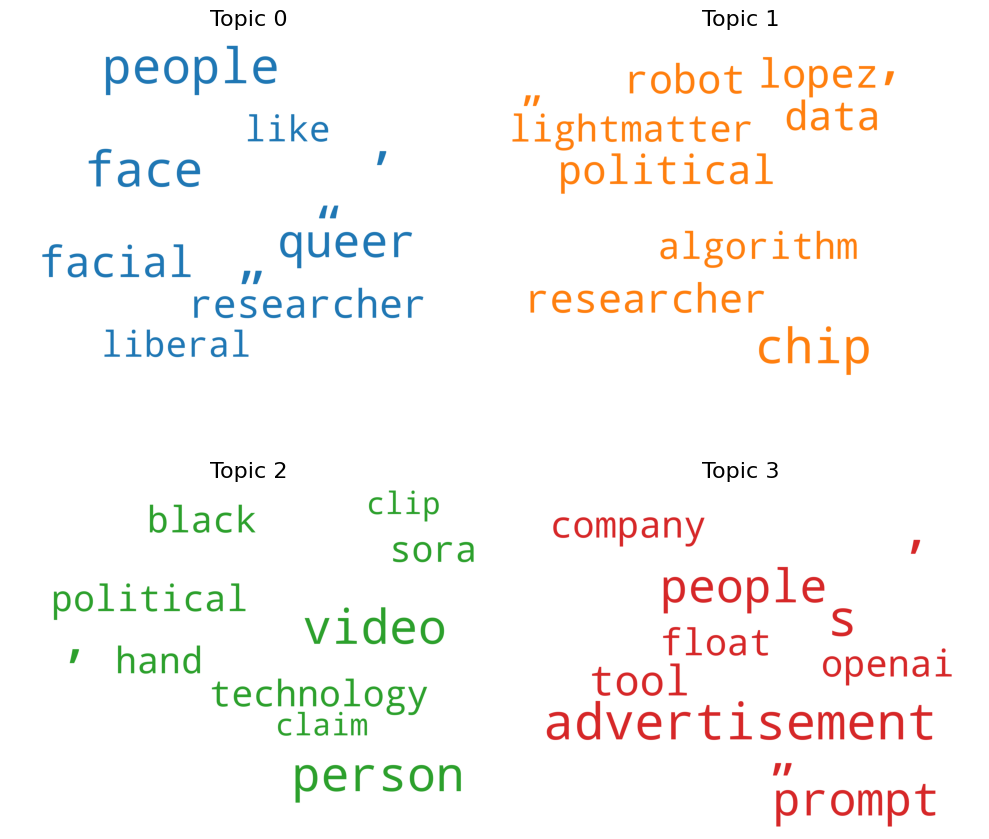

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

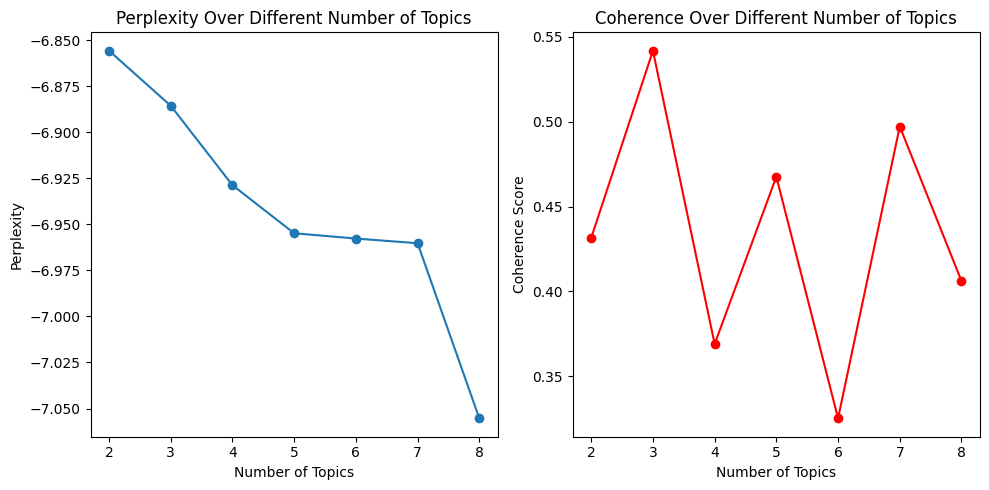

In [ ]:
import matplotlib.pyplot as plt


# Specify the range of topics you want to evaluate
start_topics = 2
end_topics = 8

# Lists to store perplexity and coherence scores
perplexity_scores = []
coherence_scores = []

# Iterate through different numbers of topics
for num_topics in range(start_topics, end_topics + 1):
    # Build LDA model
    ldamodel = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, passes=15)

    # Compute Perplexity
    perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
    perplexity_scores.append(perplexity_lda)

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot perplexity
plt.subplot(1, 2, 1)
plt.plot(range(start_topics, end_topics + 1), perplexity_scores, marker='o')
plt.title('Perplexity Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

# Plot coherence
plt.subplot(1, 2, 2)
plt.plot(range(start_topics, end_topics + 1), coherence_scores, marker='o', color='r')
plt.title('Coherence Over Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.tight_layout()
plt.show()

# **Summarization**

In [ ]:
import pandas as pd

def extract_text_from_dataframe(dataframe):
    # Assuming 'tokenized_doc' is the name of the column containing text
    text_variable = ""
    for text in dataframe:
        text_variable += str(text) + " "
    return text_variable.strip()

# Assuming 'df' is the name of your DataFrame
text_variable = extract_text_from_dataframe(tokenized_doc)
print(text_variable)


unimpressed case police officer told campaigner against antisemitism that looked "openly jewish". gideon falter near pro-palestinian march london time, metropolitan force apologise twice over incident. under headline "lost plod", paper describes remark "appalling" argues that suggests "something rank within police".  most doxxing campaigns only last days. effects felt months  content warning: this story contains vulgar language, threats sexual violence death threats.  enlarge this image toggle caption spencer platt/getty images spencer platt/getty images  doxxing practice publishing someone's private information revenge punishment been around since early days internet. it's been used against reporters, enforcement personnel women speaking against sexual abuse.  since last fall, doxxing campaigns have been used "name shame" those express opinions about israel-hamas war.  names harvard students signed onto statement from student group harvard undergraduate palestine solidarity committee 

In [ ]:
def GenerateWordFrequencyDistribution(text):
    stops = set(stopwords.words("english"))
    words = word_tokenize(text) #tokenize text by words
    freqTable = dict()

    for word in words: #Itterate through all words in text
        word = word.lower() #Convert word to lowercase
        if word not in stops: #Ignore stopwords
            if word in freqTable:
                freqTable[word] += 1 #Add one to the word frequency if it has already been added to before
            else:
                freqTable[word] = 1  #Set the word frequency to one if it has not already been added to before
    return freqTable

def CalculateSentenceImportance (text, freqTable):
    sents = sent_tokenize(text)
    sentScores = dict()

    for sent in sents:
        for word, freq in freqTable.items():
            if word in sent.lower():
                if sent in sentScores:
                    sentScores[sent] += freq #Add the frequency of a word occuring to the sentence score if it has been added to before
                else:
                    sentScores[sent] = freq  #Set score of a sentence to the score of the first word occuring in the sentence
    return sentScores, sents


def CalculateAverageSentenceImportance (sentScores):
    sumValues = 0
    for sentence in sentScores:
        sumValues += sentScores[sentence] #Calculate total sentence values

    return (sumValues / len(sentScores)) #Return average sentence value


def PerformExtractiveSummarisation(sentences, sentScores, average):
    summary = ""
    for sent in sentences:
        if (sentScores[sent] > (1.5 * average)): #Check if the sentence has a score greater than 1.5 times the average.
            summary += sent + " "

    return summary

In [ ]:
#Generate a frequency distribution based on previously acquired text
FreqTable = GenerateWordFrequencyDistribution(text_variable)
FreqTable

{'unimpressed': 1,
 'case': 2,
 'police': 2,
 'officer': 1,
 'told': 2,
 'campaigner': 1,
 'antisemitism': 2,
 'looked': 1,
 '``': 21,
 'openly': 1,
 'jewish': 1,
 "''": 31,
 '.': 67,
 'gideon': 1,
 'falter': 1,
 'near': 2,
 'pro-palestinian': 1,
 'march': 1,
 'london': 1,
 'time': 1,
 ',': 59,
 'metropolitan': 1,
 'force': 1,
 'apologise': 1,
 'twice': 1,
 'incident': 2,
 'headline': 1,
 'lost': 1,
 'plod': 1,
 'paper': 1,
 'describes': 1,
 'remark': 1,
 'appalling': 1,
 'argues': 1,
 'suggests': 2,
 'something': 4,
 'rank': 1,
 'within': 1,
 'doxxing': 6,
 'campaigns': 3,
 'last': 4,
 'days': 4,
 'effects': 2,
 'felt': 4,
 'months': 2,
 'content': 1,
 'warning': 4,
 ':': 6,
 'story': 3,
 'contains': 1,
 'vulgar': 4,
 'language': 4,
 'threats': 11,
 'sexual': 6,
 'violence': 5,
 'death': 6,
 'enlarge': 2,
 'image': 2,
 'toggle': 2,
 'caption': 6,
 'spencer': 2,
 'platt/getty': 2,
 'images': 5,
 'practice': 1,
 'publishing': 1,
 'someone': 7,
 "'s": 12,
 'private': 3,
 'information': 1

In [ ]:
#Generate sentence values for each sentence in text back on frequency of work occurance.
sentScores, Sentences = CalculateSentenceImportance(text_variable, FreqTable)
print(sentScores, Sentences)


{'unimpressed case police officer told campaigner against antisemitism that looked "openly jewish".': 86, 'gideon falter near pro-palestinian march london time, metropolitan force apologise twice over incident.': 141, 'under headline "lost plod", paper describes remark "appalling" argues that suggests "something rank within police".': 144, 'most doxxing campaigns only last days.': 86, 'effects felt months  content warning: this story contains vulgar language, threats sexual violence death threats.': 190, "enlarge this image toggle caption spencer platt/getty images spencer platt/getty images  doxxing practice publishing someone's private information revenge punishment been around since early days internet.": 134, "it's been used against reporters, enforcement personnel women speaking against sexual abuse.": 156, 'since last fall, doxxing campaigns have been used "name shame" those express opinions about israel-hamas war.': 163, "names harvard students signed onto statement from student

In [ ]:
#Calculate the average sentence importance
AverageValue = CalculateAverageSentenceImportance(sentScores)
AverageValue


145.7058823529412

In [ ]:
#Perform Extractive Summarisation on sentences and determine which sentences to keep and which to remove, returns a summary.
Summary = PerformExtractiveSummarisation(Sentences,sentScores, AverageValue)

print(Summary)

lynch hundreds emails filled with death threats, threats sexual violence promises fired from teaching after-school nature program called wild ferns with fewer than five people staff. previous next olivia lynch  hide caption warning: these images contain vulgar language, threats sexual violence death threats. previous next olivia lynch  hide caption warning: these images contain vulgar language, threats sexual violence death threats. aaron terr, director public advocacy foundation individual rights expression (fire), nonprofit that works protect free speech, said that while none these actions tearing down poster, doxxing someone firing someone misconduct illegal, they hurt free speech culture u.s.  americans feel like trip wires everywhere they don't know exactly what they can't say, scenario where millions americans national political conversation," terr said. 


In [ ]:
originl_length = len(text_variable)
print("Length of original text:", originl_length)

Length of original text: 6950


In [ ]:
summary_length = len(Summary)
print("Length of summary text:", summary_length)

Length of summary text: 873
